<a href="https://colab.research.google.com/github/NilakshanKunananthaseelan/MachineLearning/blob/main/WeighDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

#synthetic data generator
def synthetic_data(w, b, num_examples):
    """generate y = X w + b + noise"""
    X = np.random.normal(scale=1, size=(num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(scale=0.01, size=y.shape)
    y = np.where(y<0.15,1,0)
    return X, y
    
#set the number of samples for training,testing
n_train, n_test, num_inputs, batch_size = 20, 1000, 10, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_X,train_y = synthetic_data(true_w,true_b,n_train)
test_X,test_y = synthetic_data(true_w,true_b,n_test)

# create the Pytorch dataset and dataloader
train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y)


train_dataset = TensorDataset(train_X,train_y)
train_loader = DataLoader(train_dataset)

test_dataset = TensorDataset(test_X,test_y)
test_loader = DataLoader(test_dataset)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(10, 100)
        self.fc2 = nn.Linear(100, 2)
        

    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x



In [ ]:
len(train_loader),len(test_loader)

(20, 1000)

In [ ]:
import torch.optim as optim

net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.0,weight_decay=0.000)

train_loss = []

nepoch = 50
for epoch in range(nepoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if i % 5 == 1:    # print every 200 mini-batches
            print(f'[{epoch + 1}/{nepoch}] loss: {running_loss / 200:.6f}')
            running_loss = 0.0
    train_loss.append(running_loss)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1/50] loss: 0.009803
[1/50] loss: 0.030446
[1/50] loss: 0.025902
[1/50] loss: 0.023906
[2/50] loss: 0.007683
[2/50] loss: 0.023441
[2/50] loss: 0.017772
[2/50] loss: 0.016596
[3/50] loss: 0.006131
[3/50] loss: 0.018287
[3/50] loss: 0.012308
[3/50] loss: 0.011591
[4/50] loss: 0.004985
[4/50] loss: 0.014455
[4/50] loss: 0.008651
[4/50] loss: 0.008167
[5/50] loss: 0.004133
[5/50] loss: 0.011580
[5/50] loss: 0.006219
[5/50] loss: 0.005829
[6/50] loss: 0.003494
[6/50] loss: 0.009402
[6/50] loss: 0.004616
[6/50] loss: 0.004236
[7/50] loss: 0.003011
[7/50] loss: 0.007735
[7/50] loss: 0.003570
[7/50] loss: 0.003152
[8/50] loss: 0.002642
[8/50] loss: 0.006446
[8/50] loss: 0.002893
[8/50] loss: 0.002415
[9/50] loss: 0.002358
[9/50] loss: 0.005437
[9/50] loss: 0.002458
[9/50] loss: 0.001914
[10/50] loss: 0.002136
[10/50] loss: 0.004639
[10/50] loss: 0.002181
[10/50] loss: 0.001571
[11/50] loss: 0.001962
[11/50] loss: 0.004000
[11/50] loss: 0.002004
[11/50] loss: 0.001336
[12/50] loss: 0.001822
[

In [ ]:

test_loss = []

nepoch = 50
for epoch in range(nepoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(test_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if i % 100 == 1:    # print every 200 mini-batches
            print(f'[{epoch + 1}/{nepoch}] loss: {running_loss / 100:.6f}')
            running_loss = 0.0
    test_loss.append(running_loss)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1/50] loss: 0.000035
[1/50] loss: 0.068737
[1/50] loss: 0.064776
[1/50] loss: 0.059429
[1/50] loss: 0.042080
[1/50] loss: 0.044232
[1/50] loss: 0.053870
[1/50] loss: 0.038419
[1/50] loss: 0.039553
[1/50] loss: 0.040133
[2/50] loss: 0.000048
[2/50] loss: 0.032694
[2/50] loss: 0.035208
[2/50] loss: 0.040034
[2/50] loss: 0.028299
[2/50] loss: 0.028393
[2/50] loss: 0.035056
[2/50] loss: 0.024530
[2/50] loss: 0.026514
[2/50] loss: 0.027376
[3/50] loss: 0.000042
[3/50] loss: 0.026122
[3/50] loss: 0.026962
[3/50] loss: 0.034948
[3/50] loss: 0.023606
[3/50] loss: 0.023469
[3/50] loss: 0.028380
[3/50] loss: 0.020053
[3/50] loss: 0.021319
[3/50] loss: 0.022090
[4/50] loss: 0.000034
[4/50] loss: 0.022438
[4/50] loss: 0.022562
[4/50] loss: 0.031919
[4/50] loss: 0.020383
[4/50] loss: 0.020453
[4/50] loss: 0.024263
[4/50] loss: 0.017365
[4/50] loss: 0.018051
[4/50] loss: 0.018775
[5/50] loss: 0.000028
[5/50] loss: 0.019518
[5/50] loss: 0.019430
[5/50] loss: 0.029465
[5/50] loss: 0.017739
[5/50] los

In [ ]:
len(train_loss)

50

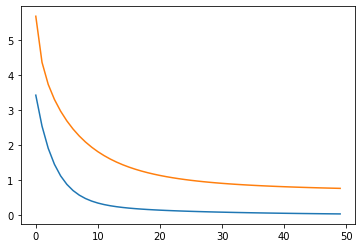

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(nepoch),train_loss,label='train_loss')
plt.plot(range(nepoch),test_loss,label='test_loss')

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print((predicted,labels))

print(f'Accuracy of the network on the test sample: {100 * correct / total} %')

Accuracy of the network on the test sample: 57.0 %
